# 迭代算法初探

In [1]:
import numpy as np
import scipy
import sympy as sym
import matplotlib
sym.init_printing()

print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("SymPy version:", sym.__version__)
print("Matplotlib version:", matplotlib.__version__)

('NumPy version:', '1.14.3')
('SciPy version:', '0.17.0')
('SymPy version:', '1.0')
('Matplotlib version:', '2.0.2')


## 求函数最小值

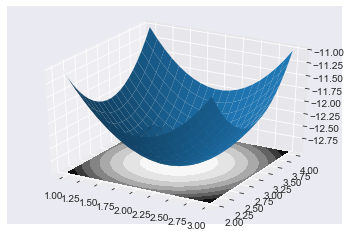

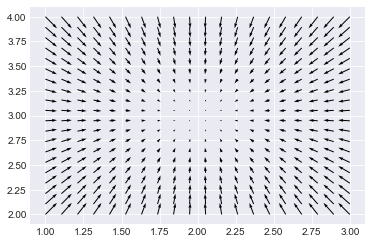

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.linspace(1,3,20)
x2 = np.linspace(2,4,20)
x1,x2=np.meshgrid(x1,x2)

z=x1**2+x2**2-4*x1-6*x2

ax.plot_surface(x1, x2, z, rstride=1, cstride=1)  
ax.contourf(x1, x2, z, zdir='z', offset=-13)                     
                     
                     
u=2*x1-4
v=2*x2-6

fig = plt.figure(2)
plt.quiver(x1,x2,-u,-v)
plt.show()

## 最速下降法

求解函数最小值
$$
z=x^2+y^2-4x-6y
$$

In [3]:
def func(x, y):
    return x**2+3*y**2-4*x-6*y
def dfunc(x, y):
    return 2*x-4, 6*y-6

In [4]:
x, y = 0, 0
for itr in range(200):
    gx, gy = dfunc(x, y)
    x+=-0.01*gx
    y+=-0.01*gy
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func(x, y)))

0 0.06000 -0.50760
1 0.72730 -5.06470
1 0.92089 -6.21809
1 0.97705 -6.65829
2 0.99334 -6.84827
2 0.99807 -6.93242
2 0.99944 -6.96988
2 0.99984 -6.98658
2 0.99995 -6.99402
2 0.99999 -6.99733


0 0.60000 -3.96000
2 1.00000 -6.99966
2 1.00000 -7.00000
2 1.00000 -7.00000
2 1.00000 -7.00000
2 1.00000 -7.00000
2 1.00000 -7.00000
2 1.00000 -7.00000
2 1.00000 -7.00000
2 1.00000 -7.00000


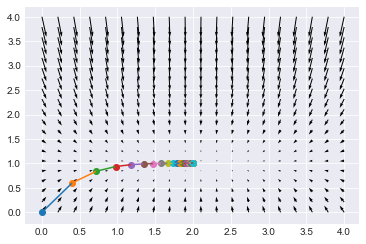

In [5]:
x, y = 0, 0
x1 = np.linspace(0,4,20)
x2 = np.linspace(0,4,20)
x1,x2=np.meshgrid(x1,x2)
u, v = dfunc(x1, x2)
plt.quiver(x1,x2,-u,-v)
for itr in range(200):
    gx, gy = dfunc(x, y)
    xo,yo=x,y
    x+=-0.1*gx
    y+=-0.1*gy
    plt.plot([xo,x],[yo,y])
    plt.scatter([xo],[yo])
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func(x, y)))

In [6]:
def func3(x, y):
    return 4 + x**2 - 2 * y + 2*y**2 - x*2 - x*y
def dfunc3(x, y):
    return 2*x-y-2, 4*y-x-2

3 2.85000 8.69500
1 0.87949 1.71699
1 0.85785 1.71429
1 0.85717 1.71429
1 0.85714 1.71429
1 0.85714 1.71429
1 0.85714 1.71429
1 0.85714 1.71429
1 0.85714 1.71429
1 0.85714 1.71429


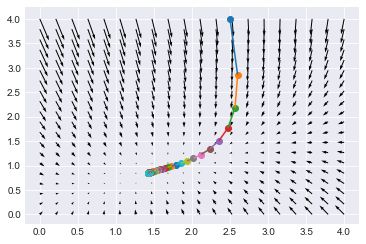

In [7]:
x, y = 2.5, 4
x1 = np.linspace(0,4,20)
x2 = np.linspace(0,4,20)
x1,x2=np.meshgrid(x1,x2)
u, v = dfunc3(x1, x2)
plt.quiver(x1,x2,-u,-v)
for itr in range(200):
    gx, gy = dfunc3(x, y)
    xo,yo=x,y
    x+=-0.1*gx
    y+=-0.1*gy
    plt.plot([xo,x],[yo,y])
    plt.scatter([xo],[yo])
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func3(x, y)))

In [8]:
def func2(x, y):
    return x*(x-1)*(x-2)*(x-3)*y*(y-1)*(y-2)*(y-3)
def dfunc2(x, y):
    return 2*(-3 + 11*x - 9*x**2 + 2*x**3)*(-3 + y)*(-2 + y)*(-1 + y)*y, 2*(-3 + x)*(-2 + x)*(-1 + x)*x*(-3 + 11*y - 9*y**2 + 2*y**3)

2 1.50000 -6.24987
2 1.50000 -6.18805
2 1.50000 -6.05028
3 1.50000 -5.94298
3 1.50000 -5.89403
3 1.50000 -5.87647
3 1.50000 -5.87071
3 1.50000 -5.86888
3 1.50000 -5.86830
3 1.50000 -5.86812


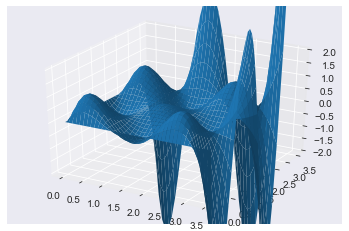

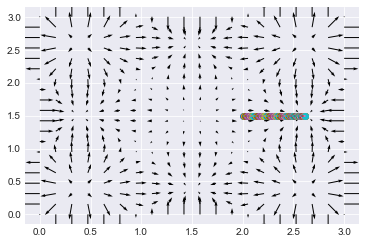

In [9]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
x1 = np.linspace(-0,3.5,40)
x2 = np.linspace(-0,3.5,40)
x1,x2=np.meshgrid(x1,x2)

z=func2(x1, x2)

ax.plot_surface(x1, x2, z, rstride=1, cstride=1)  
ax.contourf(x1, x2, z, zdir='z', offset=-13)    
ax.set_zlim3d(-2, 2)
fig = plt.figure(2)
x, y = 2., 1.5
x1 = np.linspace(0,3,20)
x2 = np.linspace(0,3,20)
x1,x2=np.meshgrid(x1,x2)
u, v = dfunc2(x1, x2)
plt.quiver(x1,x2,-u,-v)
for itr in range(200):
    gx, gy = dfunc2(x, y)
    xo,yo=x,y
    x+=-0.01*gx
    y+=-0.01*gy
    plt.plot([xo,x],[yo,y])
    plt.scatter([xo],[yo])
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func(x, y)))

## 牛顿法

$$
\Delta \varepsilon = \nabla f ^T \Delta x +\frac{1}{2}  \Delta x ^T H \Delta x
$$

$$
\Delta x = x - H^{-1} \nabla x
$$

对于第一个例子Hessian矩阵为单位矩阵

In [10]:
def func3(x, y):
    return 4 + x**2 - 2 * y + 2*y**2 - x*2 - x*y
def dfunc3(x, y):
    return 2*x-y-2, 4*y-x-2

In [11]:
def Hessian(x, y):
    return np.array([[4, -1],[-1, 2]])

2 3.35714 12.75056
2 0.91276 1.74934
2 0.86999 1.71911
1 0.86190 1.71497
1 0.85893 1.71438
1 0.85781 1.71430
1 0.85740 1.71429
1 0.85724 1.71429
1 0.85718 1.71429
1 0.85716 1.71429


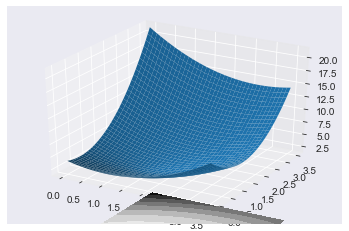

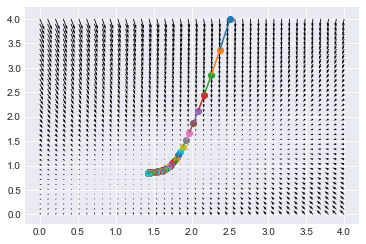

In [12]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
x1 = np.linspace(-0,3.5,40)
x2 = np.linspace(-0,3.5,40)
x1,x2=np.meshgrid(x1,x2)

z=func3(x1, x2)

ax.plot_surface(x1, x2, z, rstride=1, cstride=1)  
ax.contourf(x1, x2, z, zdir='z', offset=-13)    
#ax.set_zlim3d(-2, 2)
fig = plt.figure(2)
x, y = 2.5, 4
x1 = np.linspace(0,4,40)
x2 = np.linspace(0,4,40)
x1,x2=np.meshgrid(x1,x2)
u, v = dfunc3(x1, x2)
plt.quiver(x1,x2,-u,-v)
for itr in range(200):
    gx, gy = dfunc3(x, y)
    H = Hessian(x, y)
    iH=np.linalg.inv(H)
    v=np.array([[gx],[gy]])
    hg=np.dot(iH, v)
    gx, gy = hg[0,0], hg[1, 0]
    xo,yo=x,y
    x+=-0.1*gx
    y+=-0.1*gy
    plt.plot([xo,x],[yo,y])
    plt.scatter([xo],[yo])
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func3(x, y)))

## 高斯牛顿法

$$
e'=e+J\Delta x\\
J=\nabla e ^T
$$

$$
\frac{1}{2} ||e'||^2=\frac{1}{2} ||e'||^2+e^T J (x-x_0)+\frac{1}{2} (x-x_0)J^T J (x-x_0)
$$

对x求微分使得线性增量为0，得到：
$$
dx=(J^T J)^{-1} J^T e
$$

In [13]:
def func3(x, y):
    return 4 + x**2 - 2 * y + 2*y**2 - x*2 - x*y
def dfunc3(x, y):
    return 2*x-y-2, 4*y-x-2
def J(x, y):
    return np.array([[2*x-y-2, 4*y-x-2]])

3 3.83424 17.38688
2 1.36781 2.42520
1 0.91638 1.72336
1 0.91648 1.72339
1 0.91648 1.72339
1 0.91648 1.72339
1 0.91648 1.72339
1 0.91648 1.72339
1 0.91648 1.72339
1 0.91648 1.72339


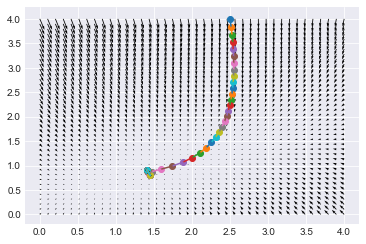

In [14]:
fig = plt.figure(2)
x, y = 2.5, 4
x1 = np.linspace(0,4,40)
x2 = np.linspace(0,4,40)
x1,x2=np.meshgrid(x1,x2)
u, v = dfunc3(x1, x2)
plt.quiver(x1,x2,-u,-v)
for itr in range(200):
    gx, gy = dfunc3(x, y)
    fj=J(x,y)
    H = np.dot(fj.T,fj)
    iH=np.linalg.inv(H+0.3*np.eye(2))
    v=np.array([[gx],[gy]])
    hg=np.dot(iH, fj.T)*func3(x, y)
    gx, gy = hg[0,0], hg[1, 0]
    xo,yo=x,y
    x+=-0.1*gx
    y+=-0.1*gy
    plt.plot([xo,x],[yo,y])
    plt.scatter([xo],[yo])
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func3(x, y)))

## 拟牛顿法

牛顿法虽然收敛速度快，但是需要计算函数的二阶导数，计算复杂度很大，而且Hessian矩阵无法保持正定，因此提出了**拟牛顿法**，这个方法的基本思想是：不用二阶偏导构造近似的H正定矩阵。
### 拟牛顿条件
$$
dx:=x-x_{k+1}\\
f(x)=f(x_{k+1})+g dx+\frac{1}{2} dx H dx
$$

对两边同时计算梯度：
$$
\nabla f =\nabla f(x_{k+1})+H_{k+1}dx
$$
令$x=x_k$
$$
g_{k+1}-g_k=y_k=H_{k+1}s_k
$$

这就是拟牛顿条件，H与H逆可以近似的用向量表示，通常近似用B与D表示
$$
y_k=B_{k+1}s_k\\
s_k=D_{k+1}y_k
$$

### 拟牛顿算法-DFGS

构造：
$$
B_{k+1}=B_k+\Delta B_k\\
\Delta B_k=\alpha uu^T +\beta vv^T
$$

带入：
$$
y_k=B_k s_k + (\alpha u^T s_k)u+(\beta v^T s_k)v
$$
对应位相等：
$$
\alpha =\frac{1}{y_k^T s_k}\\
\beta=-\frac{1}{s_k^T B_k s_k}
$$

$$
D_{k+1}=(I-\frac{s_k y_k^T}{y^T s_k})D_k(I-\frac{y_k s_k^T}{y_k^T s_k})+\frac{s_k s_k^T}{y_k^T s_k}
$$

In [15]:
def func3(x, y):
    return 4 + x**2 - 2 * y + 2*y**2 - x*2 - x*y
def dfunc3(x, y):
    return np.array([[2*x-y-2],[4*y-x-2]])
def J(x, y):
    return np.array([[2*x-y-2, 4*y-x-2]])

3 2.85000 8.69500
2 1.09504 1.81350
1 0.88607 1.71575
1 0.86066 1.71431
1 0.85757 1.71429
1 0.85719 1.71429
1 0.85715 1.71429
1 0.85714 1.71429
1 0.85714 1.71429
1 0.85714 1.71429


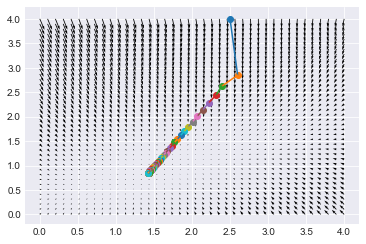

In [16]:
D=np.eye(2)
fig = plt.figure(2)

x1 = np.linspace(0,4,40)
x2 = np.linspace(0,4,40)
x1,x2=np.meshgrid(x1,x2)
g=dfunc3(x1, x2)
plt.quiver(x1,x2,-g[0,0],-g[1,0])
g=dfunc3(x, y)
x, y = 2.5, 4
for itr in range(200):
    g = dfunc3(x, y)
    d = -np.dot(D, g)
    s = 0.1*d
    gx, gy = s[0,0], s[1, 0]
    xo, yo=x, y
    x+=float(gx)
    y+=float(gy)
    g2=dfunc3(x, y)
    ys=g2-g
    div=1/np.dot(ys.T, s)
    mt1=np.eye(2)-np.dot(s,ys.T)*div
    mt2=np.eye(2)-np.dot(ys,s.T)*div
    mt3=np.dot(s,s.T)*div
    D=np.dot(mt1,np.dot(D,mt2))+mt3
    plt.plot([xo,x],[yo,y])
    plt.scatter([xo],[yo])
    if(itr%20==0):
        print("%.f %.5f %.5f"%(x, y, func3(x, y)))
plt.show()

## 拟牛顿法-LBFGS

上述矩阵计算过程中需要用到矩阵D
当向量长度很大的时候D的存储消耗很大。

$$
D_{k+1}=V_k^T D_k V_k+\rho s_k s_k^T
$$

#### 数学归纳法
总结迭代规律：
$$
D_{k+1}=V_k^T\cdots V_0^T D_0 V_0 \cdots V_k\\
+V_{k}^T\cdots V_{k-1}^T \rho_{k-2} s_{k-2} s_{k-2}^T V_{k-1} \cdots V_k\\
+\rho_k s_k s_k^T
$$

因此在计算时可以保存最近生成的向量${s_i, y_i}$

### 矩阵表示

In [11]:
x, y = sym.symbols('x y')
z = x**2-4*x+y**2-6*y
z

In [18]:
M1 = sym.Matrix([[1, 0], [0, 1]])
M2 = sym.Matrix([[-4], [-6]])
V = sym.Matrix([[x, y]])
Z=V*M1*V.T+V*M2
Z

⎡ 2          2      ⎤
⎣x  - 4⋅x + y  - 6⋅y⎦

In [19]:
GRAD = sym.Matrix([Z.diff(x),Z.diff(y)])
GRAD

⎡2⋅x - 4⎤
⎢       ⎥
⎣2⋅y - 6⎦

## 函数最小值与泛函

定义方程
$$2x+3y=13\\x+y=5$$
矩阵书写形式：
$$A\cdot x = b$$
求解可得：
$$x=A^{-1}\cdot b$$
另外一种：
$$f(x)=x^T \cdot A^T \cdot A \cdot x - 2\cdot x^T \cdot A^T \cdot b$$
求函数极小值

In [17]:
x_1, x_2 = sym.var('x_1 x_2')
x=sym.Matrix([[x_1], [x_2]])

A=sym.Matrix([[2,3],[1,1]])
b = sym.Matrix([[13],[5]])
f=x.T*A.T*A*x-2*x.T*A.T*b
sym.simplify(f)

⎡    2                           2        ⎤
⎣5⋅x₁  + 14⋅x₁⋅x₂ - 62⋅x₁ + 10⋅x₂  - 88⋅x₂⎦

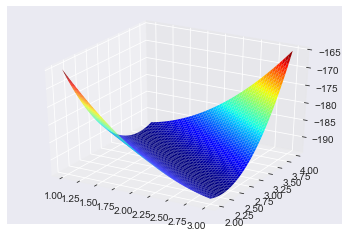

In [18]:
sym.plotting.plot3d(f[0], (x_1,1,3),(x_2,2,4))

In [4]:
(f.diff(x_1),f.diff(x_2))

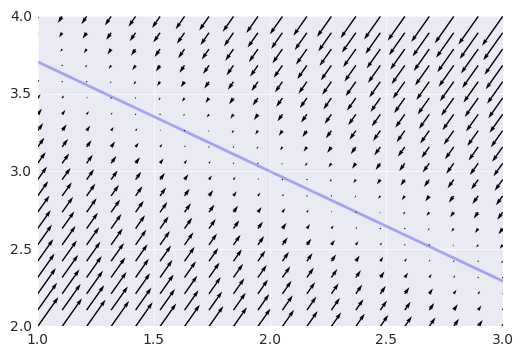

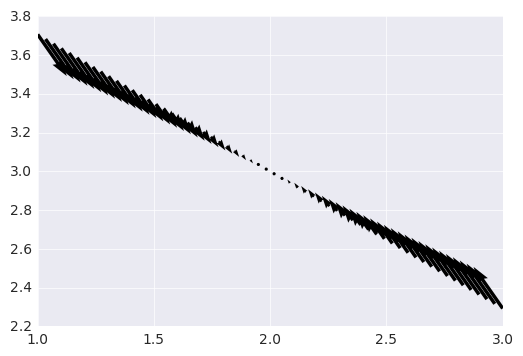

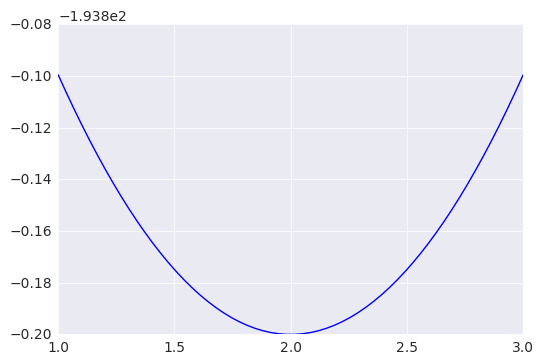

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(1,3,20)
x2 = np.linspace(2,4,20)
x1,x2=np.meshgrid(x1,x2)
u = 10*x1+14*x2-62
v = 14*x1+20*x2-88
#u=2*x1-4
#v=2*x2-6
mpl.style.use('seaborn-darkgrid')
plt.figure(1)
plt.quiver(x1,x2,-u,-v)
x=np.linspace(1,3,100)
y=4.41429 - 0.707143*x
plt.plot(x,y,lw=2,alpha=0.3)

plt.figure(2)
xx1 = np.linspace(1,3,60)
xx2 = 4.41429 - 0.707143*xx1
uu = 10*xx1+14*xx2-62
vv = 14*xx1+20*xx2-88
plt.quiver(np.array(xx1),np.array(xx2),-np.array(uu),-np.array(vv))
plt.figure(3)
plt.plot(xx1,5*xx1**2+14*xx1*xx2-62*xx1+10*xx2**2-88*xx2)
plt.show()

## 收敛速度问题

In [ ]:
A=sym.Matrix([[2,3],[1,1]])
b = sym.Matrix([[13],[5]])
f=x.T*A.T*A*x-2*x.T*A.T*b
u = 10*x1+14*x2-62
v = 14*x1+20*x2-88

In [13]:
import numpy as np
A=np.array([[2,3],[1,1]])
b=np.array([[13],[5]])

def nfunc1(vec):
    return vec.T.dot(A.T).dot(A).dot(vec)-2*vec.T.dot(A.T).dot(b)
def ndfunc1(vec):
    return np.transpose(vec.T.dot(A.T).dot(A))+A.T.dot(A).dot(vec)-2*A.T.dot(b)
x=np.array([[0],[0]])
for itr in range(600):
    x=x-0.01*ndfunc1(x)
    if(itr%60==0):
        print(x,nfunc1(x))

[[ 0.62]
 [ 0.88]] [[-98.5756]]
[[ 2.07028874]
 [ 2.95046617]] [[-193.99950485]]
[[ 2.06485792]
 [ 2.95429338]] [[-193.99957841]]
[[ 2.05984671]
 [ 2.95782487]] [[-193.99964104]]
[[ 2.05522269]
 [ 2.96108351]] [[-193.99969437]]
[[ 2.05095593]
 [ 2.96409037]] [[-193.99973977]]
[[ 2.04701885]
 [ 2.96686491]] [[-193.99977843]]
[[ 2.04338597]
 [ 2.96942508]] [[-193.99981135]]
[[ 2.04003377]
 [ 2.97178743]] [[-193.99983937]]
[[ 2.03694058]
 [ 2.97396726]] [[-193.99986324]]


In [15]:
import numpy as np
A=np.array([[1,2],[1,1]])
b=np.array([[1],[1]])

def nfunc1(vec):
    return vec.T.dot(A.T).dot(A).dot(vec)-2*vec.T.dot(A.T).dot(b)
def ndfunc1(vec):
    return np.transpose(vec.T.dot(A.T).dot(A))+A.T.dot(A).dot(vec)-2*A.T.dot(b)
x=np.array([[0],[0]])
for itr in range(600):
    x=x-0.1*ndfunc1(x)
    if(itr%60==0):
        print(x,nfunc1(x))

[[ 0.4]
 [ 0.6]] [[-1.64]]
[[ 0.88115663]
 [ 0.07344924]] [[-1.99715228]]
[[ 0.9798948]
 [ 0.0124257]] [[-1.9999185]]
[[ 0.99659872]
 [ 0.0021021 ]] [[-1.99999767]]
[[  9.99424593e-01]
 [  3.55621198e-04]] [[-1.99999993]]
[[  9.99902656e-01]
 [  6.01618356e-05]] [[-2.]]
[[  9.99983532e-01]
 [  1.01778142e-05]] [[-2.]]
[[  9.99997214e-01]
 [  1.72182082e-06]] [[-2.]]
[[  9.99999529e-01]
 [  2.91287194e-07]] [[-2.]]
[[  9.99999920e-01]
 [  4.92781995e-08]] [[-2.]]


In [18]:
import numpy as np
A=np.array([[2,-1,0],[5,3,2],[3,0,1]])
b=np.array([[7],[3],[7]])

def nfunc1(vec):
    return vec.T.dot(A.T).dot(A).dot(vec)-2*vec.T.dot(A.T).dot(b)
def ndfunc1(vec):
    return np.transpose(vec.T.dot(A.T).dot(A))+A.T.dot(A).dot(vec)-2*A.T.dot(b)
x=np.array([[0],[0],[0]])
for itr in range(6000):
    x=x-0.01*ndfunc1(x)
    if(itr%600==0):
        print(x,nfunc1(x))

[[ 1.  ]
 [ 0.04]
 [ 0.26]] [[-60.6412]]
[[ 2.08380857]
 [-2.90340445]
 [ 0.65909568]] [[-106.98621939]]
[[ 2.02404299]
 [-2.97228869]
 [ 0.90220144]] [[-106.99886586]]
[[ 2.00689745]
 [-2.99205019]
 [ 0.97194357]] [[-106.99990666]]
[[ 2.00197874]
 [-2.99771936]
 [ 0.99195118]] [[-106.99999232]]
[[ 2.00056766]
 [-2.99934573]
 [ 0.99769096]] [[-106.99999937]]
[[ 2.00016285]
 [-2.9998123 ]
 [ 0.99933758]] [[-106.99999995]]
[[ 2.00004672]
 [-2.99994615]
 [ 0.99980997]] [[-107.]]
[[ 2.0000134 ]
 [-2.99998455]
 [ 0.99994548]] [[-107.]]
[[ 2.00000384]
 [-2.99999557]
 [ 0.99998436]] [[-107.]]


$$
2x-y+z=10\\
3x+2y-z=16\\
x+6y-z=28
$$